# Project: Investigate Brazilian Patient Data and Doctoral Appointment No-shows

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='wrangling'></a>
## Data Wrangling

### General Properties

This dataset was originally sourced from [Kaggle](kaggle.com), find it here for [download in csv-format](https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd2e9a_noshowappointments-kagglev2-may-2016/noshowappointments-kagglev2-may-2016.csv).


## Introduction

This notebook aims to investigate and analyze brazilian doctoral patient data and reporting of no-show appointments. Resources for medical provision must be allocated effectively to secure health care provision for the general population for this allocation data analysis as such provide a basis. The dataset is to be investigated for key parameters, as well as dependencies to point out when several factors combined are impacting doctoral attendences.

In [1]:
# Import of packages

import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
%matplotlib inline

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant dat

df = pd.read_csv('no_show.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
# infos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


### Data Cleaning Steps

After having gained an overview of the dataset by visually exploring the first rows as well as columns and infos about columns and content, the following cleaning steps for further analysis where chosen.

1. The first cleaning step checks for nan values

In [4]:
# Nan values are checked for
df.isna().any().sum()

0

2. Dates are converted to datetime datatype for subsequent timedelta querying and plotting

In [5]:
# Converting the columns scheduled day and appointment day to daytime-object for further analysis.
df[['ScheduledDay','AppointmentDay']] = df[['ScheduledDay','AppointmentDay']].apply(pd.to_datetime)

3. To widen the opportunity to investigate age effects on patient appointments, bins are created to categorize patients further. 

In [6]:
# Create bins for age groups based on percentiles
bin_edges = [-1.01, 18, 37, 55 ,115]
bin_names = ['child', 'working_age', 'mid_age', 'old_age']
df['Age_group'] = pd.cut(df.Age, bin_edges, labels=bin_names)

4. Columns are renamed to standardize for better usage in analysis. 

In [7]:
# Rename Columns for querying and other operations, also lowercase all letters for standardisation
df=df.rename(columns = {'No-show' : 'No_show'})
df.columns = df.columns.str.lower()

5. For arithemics in further analysis no-show column values are converted to standard 0/1

In [8]:
# Convert no_show column from yes/no to 1/0
df.no_show = df.no_show.map(dict(Yes=1, No=0))

6. A quick analyis in repeated patientIDs, to consider significance.

In [9]:
# patients have been recorded for several appointments in this dataset, to have a brief look into wether these fail to hold appointments I query for no-show=True and groupby
df.patientid.value_counts().head(15)

8.221459e+14    88
9.963767e+10    84
2.688613e+13    70
3.353478e+13    65
6.264199e+12    62
2.584244e+11    62
8.713749e+14    62
7.579746e+13    62
6.684488e+13    57
8.722785e+11    55
8.923969e+13    54
8.435224e+09    51
8.534397e+14    50
1.447997e+13    46
6.543360e+13    46
Name: patientid, dtype: int64

In [10]:
show = df.query('no_show == 0')
no_show = df.query('no_show == 1')
no_show.patientid.value_counts().head(15)

1.421987e+12    18
5.635135e+14    16
5.587790e+12    15
5.811973e+14    14
6.575144e+13    13
1.198157e+12    12
9.715136e+12    11
2.728422e+12    11
4.768616e+11    11
2.491637e+14    11
9.338860e+13    10
9.915266e+13    10
8.485848e+14    10
4.629579e+12    10
3.645216e+11     9
Name: patientid, dtype: int64

6. answer: As repeat patientIDs do not tend to be the same and number for repeat no_showers is relatively low, this metric is not considered for special investigation, also it is likely that the parameters that prevented repeat no-show patients from showing up, are the same or similar in each appointment.

<a id='eda'></a>
## Exploratory Data Analysis

In [11]:
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,age_group
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0,old_age
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0,old_age
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,0,old_age
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,child
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,0,old_age


In [12]:
# Calculate total number of no_shows
f'Percentage of No_shows averaged throughout dataset:{round(df.no_show.mean() *100, 2)}%'


'Percentage of No_shows averaged throughout dataset:20.19%'

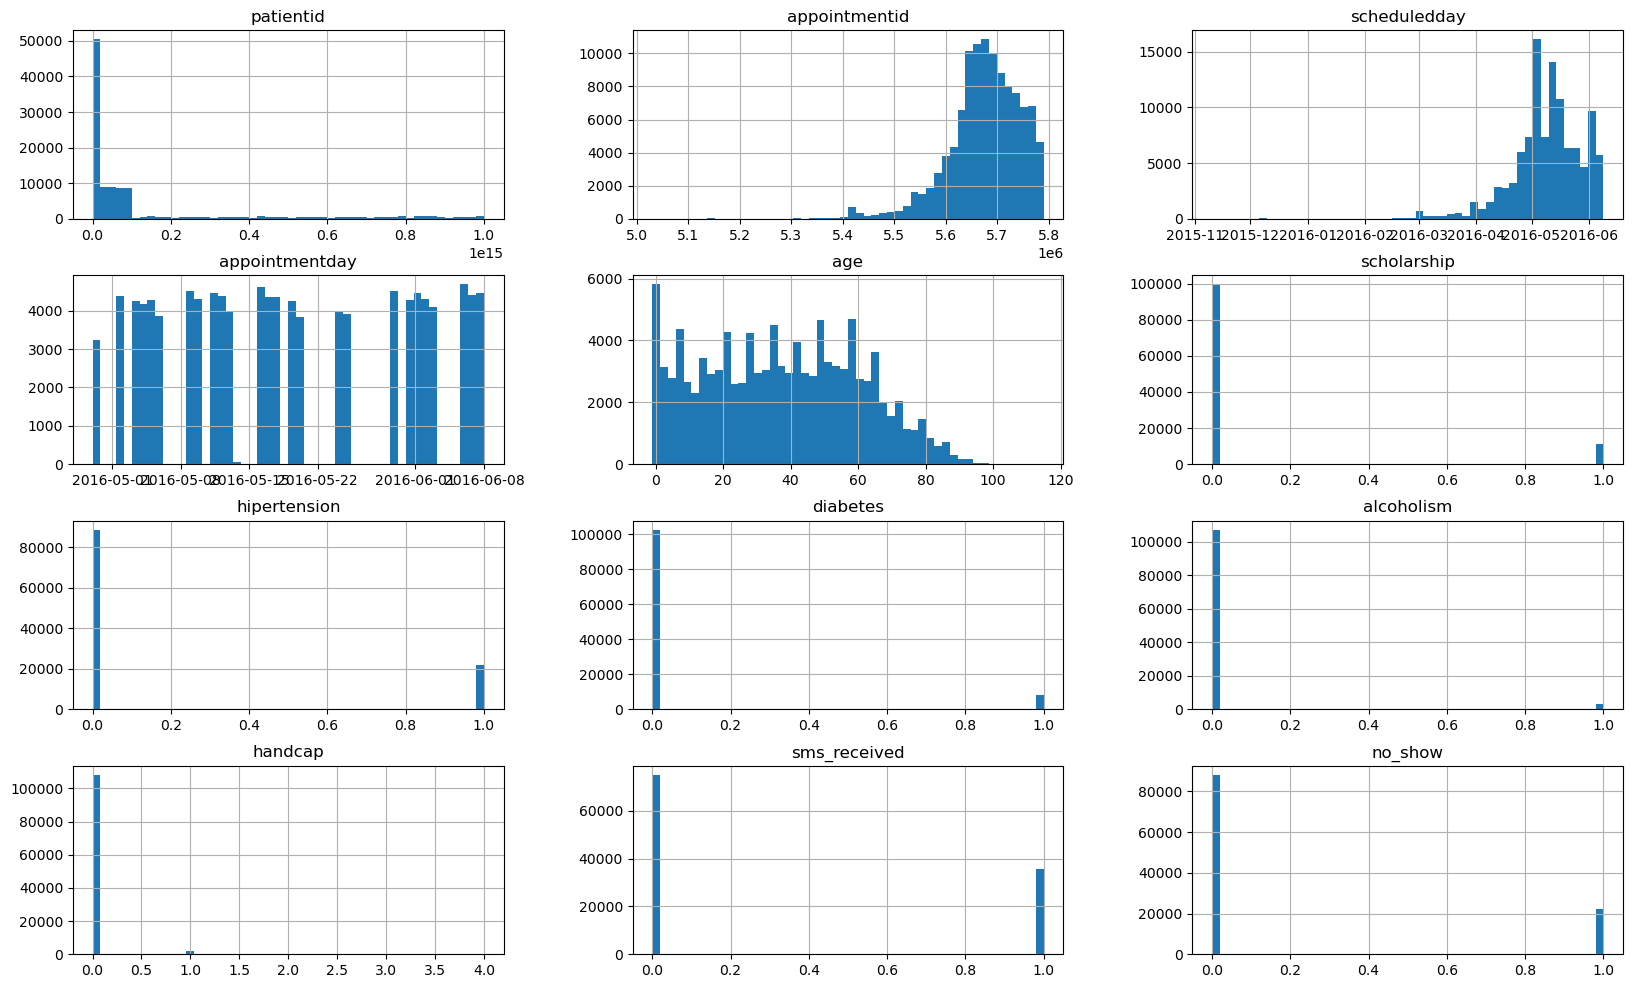

In [13]:
# Overview of dataset and columns 
df.hist(bins=50,figsize=(20,12));


### Research Question 1: Do neighbourhoods influence the rate of doctoral appointment no-shows?

In [14]:
# Investigating neighbourhoods exlusively in regards to show or no shows
hoods_no_show = no_show.groupby(['neighbourhood']).count()['no_show']
hoods = df.groupby(['neighbourhood']).count()['no_show']
hoods_show = show.groupby(['neighbourhood']).count()['no_show']

percentages_no_show = hoods_no_show/hoods*100
percentages_no_show.sort_values()

neighbourhood
ILHA DO BOI                      8.571429
AEROPORTO                       12.500000
MÁRIO CYPRESTE                  14.555256
SOLON BORGES                    14.712154
DE LOURDES                      15.409836
                                  ...    
SANTA CLARA                     26.482213
SANTA CECÍLIA                   27.455357
SANTOS DUMONT                   28.918495
ILHAS OCEÂNICAS DE TRINDADE    100.000000
PARQUE INDUSTRIAL                     NaN
Name: no_show, Length: 81, dtype: float64

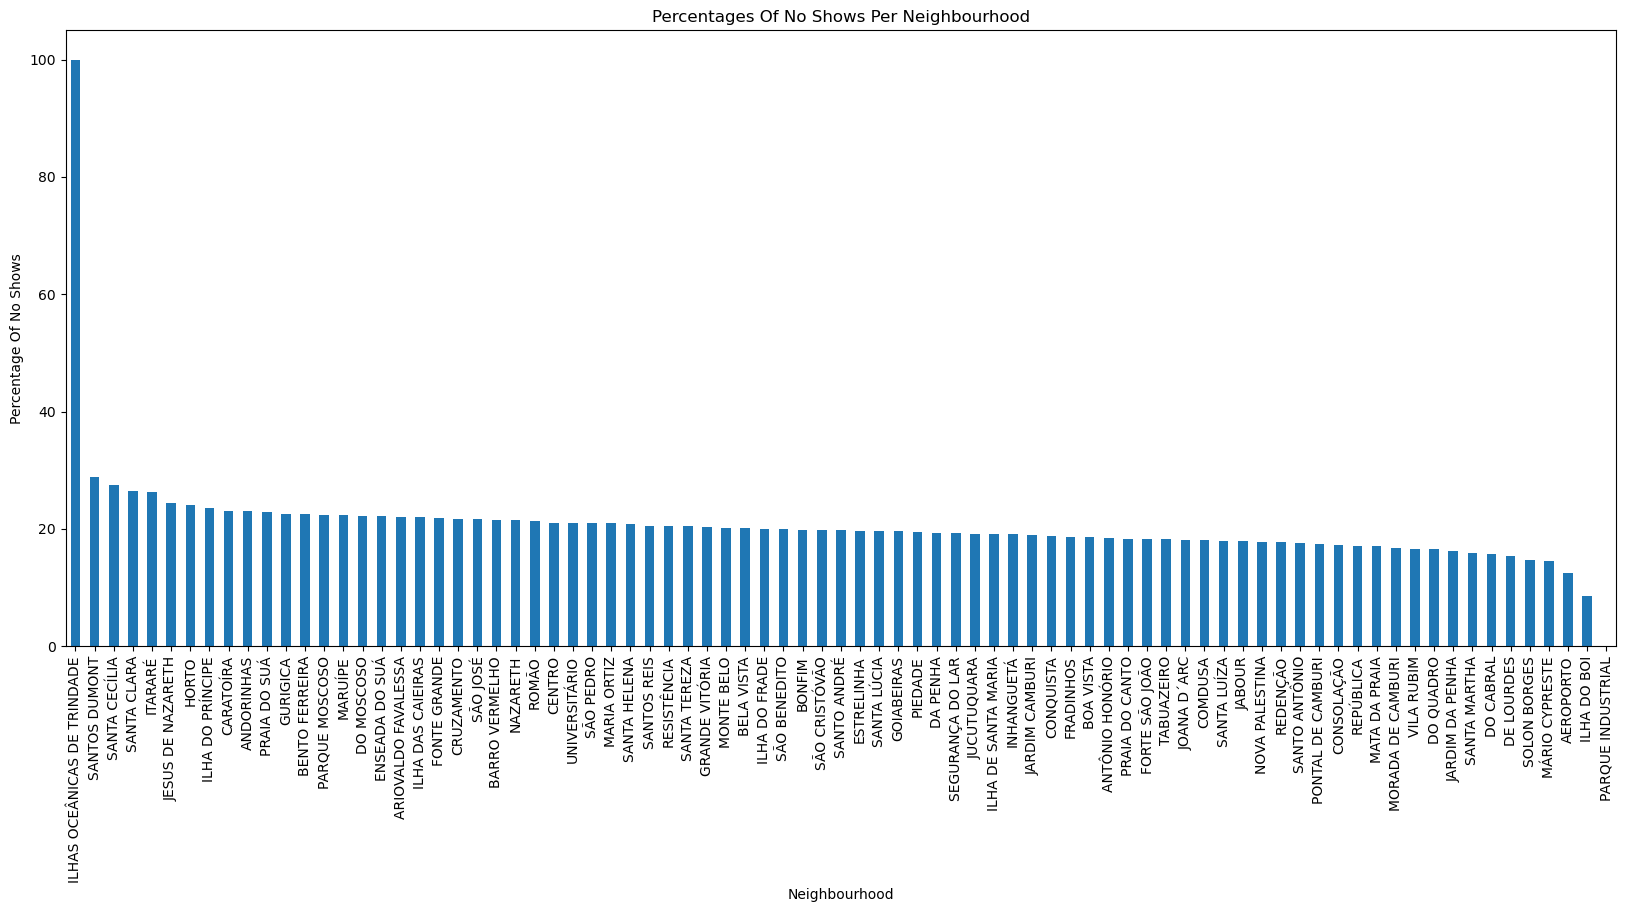

In [15]:
# Plotting percentages of no_shows per neighbourhood
percentages_no_show.sort_values(ascending=False).plot(kind='bar', title='Percentages of No shows per Neighbourhood'.title(), figsize=(20,8));
plt.ylabel('Percentage of no_shows'.title().replace("_"," "))
plt.xlabel('neighbourhood'.title());

In [16]:
# Investigate outliers
number1 = df.query("neighbourhood == 'ILHAS OCEÂNICAS DE TRINDADE'").shape[0]
print(f' Number of ILHAS OCEÂNICAS DE TRINDADE: {number1}')
numberlast = df.query("neighbourhood == 'PARQUE INDUSTRIAL'").shape[0]
print(f' PARQUE INDUSTRIAL:{number1}')

 Number of ILHAS OCEÂNICAS DE TRINDADE: 2
 PARQUE INDUSTRIAL:2


The neighbourhood of patients was investigated as an independent variable as can be seen above in the bar chart, the differences are limited, to outlier to the max, which is island of trinidade only recorded 2 appointments, which is not representative, but also may have occured due to the given geograhic location which is far from the mainland. The outlier to the minimum is Parque Industrial which is not a residential area and equally only recorded 2 appointments.

<span style="color: blue;">Hence, the data suggests that the neighbourhood by itself is not a primary driver in rate of appointment no-shows.</span>.



### Research Question 2: When categorizing patient age, do certain age groups have higher rates of no-shows? 

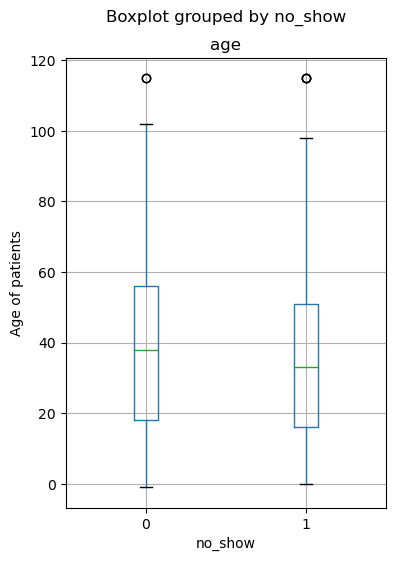

In [17]:
# Plotting age(continuous) to no_shows(categorical)
df.boxplot( column= 'age', by='no_show', figsize=(4,6));
plt.ylabel('Age of patients');

In [18]:
# Function built for general plotting of groupby parameters to investigate effect on no_shows
def myGroPlot(df, grpVar, yVar='no_show', color='steelblue', figsize=(14,6), alpha=0.7):
    '''base function for groupby plotting of dependent variables to no_show column'''
    # plotting
    df.groupby([grpVar])[yVar].mean().plot.bar(edgecolor='black', figsize=figsize, rot=0, width=0.6, color=color, alpha=alpha)
    grpVar=grpVar.replace("_"," ")
    yVar=yVar.replace("_"," ")
    plt.title(f'Proportion of patients who do not show by {grpVar}'.title(), fontsize = 14, weight = "bold")
    plt.xlabel(grpVar.title(), fontsize =10, weight = "bold")
    plt.ylabel('Proportions of patients who do not show'.title(), fontsize = 8, weight='bold')
    plt.grid(axis='y')

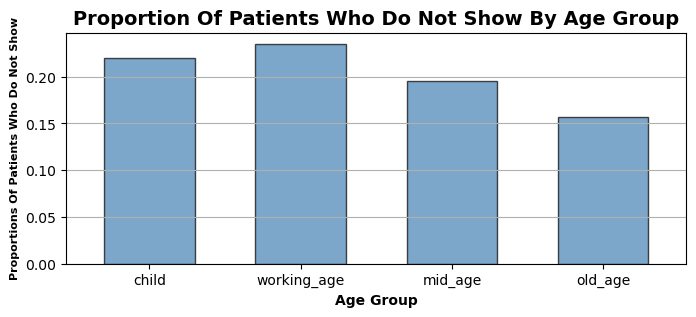

In [19]:
# Plotting age_group(categorical) to no_show(continuous)
myGroPlot(df, 'age_group', figsize=(8,3))

Interestingly working_age/productive age individuals are missing appointments to a signifcantly higher degree that mid_age people or seniors. It is presumed that child no_show rate is dependently influenced by working_age individuals, which are caregivers of childs, hence the former unavailability likely causaly reflects in the no_show data of the latter

<span style="color: blue;">Hence, the data suggests that patient age is a significant factor in appointment no-shows.</span>.

### Research Question 3: Does the timespan between schedule and appointment make a difference?

In [20]:
df['timespan_schedule'] = df['appointmentday'] - df['scheduledday'] 
df.groupby('no_show')['timespan_schedule'].mean()

no_show
0    8 days 06:56:46.224594141
1   15 days 08:17:34.998879878
Name: timespan_schedule, dtype: timedelta64[ns]

The **dependent variable** timespan between schedules and appointments has been queried and saved in a new column, which then was grouped between shows and no-shows.

<span style="color: blue;">The data suggests that the timespan between scheduling and appointment is significant in the rate of no-shows.</span>.

### Research Question 4: Is scholarship a significant factor in patient showing/no_showing?

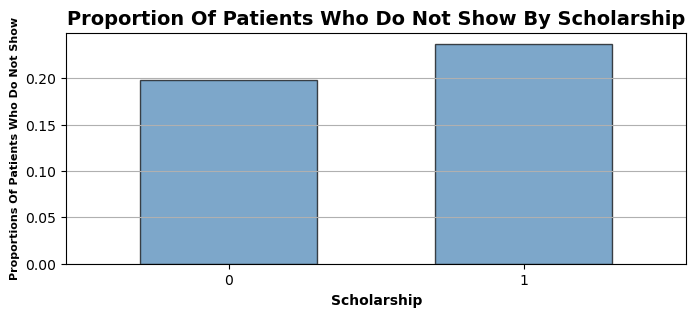

In [21]:
# Plotting scholarship data in relation to no-shows
myGroPlot(df, 'scholarship', figsize=(8,3))

In [22]:
# Considering the average ages of scholarship recipients
df.groupby('scholarship')[['age', 'no_show']].mean()

,age,no_show
scholarship,,
0,37.794223,0.198072
1,30.616242,0.237363


At first sight it appears that scholarship is a significant factor, however, when considering the ages of scholarship recipients, we notice that recipients are on average 7 years younger than non-recipients, and as prior investigated, age is a significant factor, meaning younger patients - child/working_age - have shown to miss significantly more appointments, hence this parameter is working contrary to the scholarship parameter

<span style="color: blue;">Overall the influence of scholarship and hence free doctoral visits can not be concluded at this point.</span>.

### Research Question 5: Are medical conditions a factor in no_shows and do sms services support patient commitment to appointments?

In [23]:
# Grouping and scoring averages for conditions and sms
df.groupby('no_show')[['hipertension', 'diabetes', 'alcoholism', 'handcap', 'sms_received']].mean()

,hipertension,diabetes,alcoholism,handcap,sms_received
no_show,,,,,
0,0.204392,0.073837,0.030417,0.022742,0.291334
1,0.169004,0.064071,0.030333,0.020297,0.438371


In [24]:
# check for unique handcap values 
df.handcap.unique()

array([0, 1, 2, 3, 4])

In [25]:
# Converting categorical levels of handcap to binary classification 0/1
df['handcap'] = (df['handcap']>=1).astype(int)
df.handcap.unique()

array([0, 1])

In [26]:
# Using pandas melt functionality to effectively plotting data about medical conditions
df_med_condition = df[['hipertension', 'diabetes', 'alcoholism', 'handcap', 'sms_received', 'no_show']]
melt = df_med_condition.melt(id_vars=['no_show'], var_name='condition')

In [27]:
melt.head()

,no_show,condition,value
0,0,hipertension,1
1,0,hipertension,0
2,0,hipertension,0
3,0,hipertension,0
4,0,hipertension,1


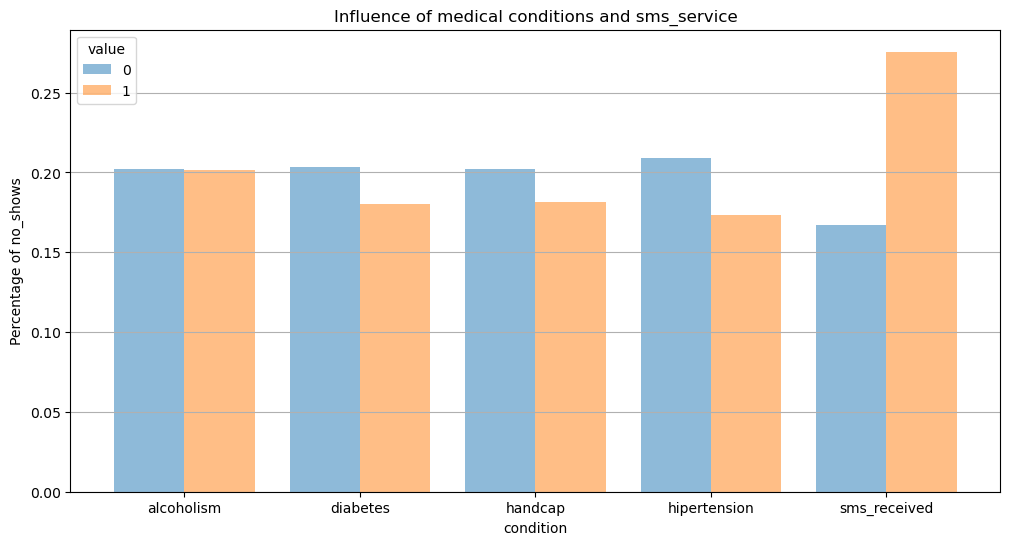

In [28]:
# Plotting averages for conditions and sms
melt.groupby(['condition','value'])['no_show'].value_counts(normalize=True).unstack('no_show').loc[:,1].unstack('value').plot.bar(title='Influence of medical conditions and sms_service',figsize=(12,6),rot=0, width=0.8, alpha=0.5)
plt.ylabel('Percentage of no_shows');
plt.grid(axis='y')


<span style="color: blue;">Plot and data suggest that patients with medical conditions other than alcohol adhere to their doctoral appointments more often, while an sms-service appears to lead to a higher rate of no-shows. </span>

<a id='conclusions'></a>
## Conclusions

Overall the dataset was clean without missing values, and therefore not many cleaning, gathering, and wrangling steps had to be performed to gain insights from the dataset. 

After basic gathering steps, a range of independent variables could directly be investigated grouped queried, and plotted, these included:

- neighbourhood
- patient age
- scholarship status
- patients medical conditions
- sms service

As a dependent variable the timespan between schedule and appointment was investigated.

A significant influence on appointment adherence could be observed by **patient age**, and **timespan between scheduling and appointment**, younger patients - working age centered individuals, and indirectly their care-given children have shown to miss the most appointments. In regards to timespan, also more appointments are missed the further apart schedules and appointments are. Noted should be that there is a tendency of doctoral sms-services leading to higher rates of no-show, hypothetically due to "casualisation" of appointments.

On the contrary, effects of neighbourhoods can be excluded as a factor, while patients medical conditions indicate a higher commitment to appointments, in particular hypertension patients. 

Inconclusive remains the data on scholarship status. While patients with scholarships tend to miss around 4% more appointments than non-recipients, these recipients however are on average 7 years than non-recipients, and since patient age has been proven to be a factor, no clear statement can be made without furhter investigating scholarship data with advanced methodologies.
